# **Mall Customers**

This notebook uses the mall customers file downloaded from Kaggle.com and will test two hypostheses: female vs male spending and spending by age group. **Note:** the Spending Score is a score assigned by the mall based on customer behavior and spending nature

First I'll link my Google Drive to Python

In [ ]:
# This connects python to my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Next I'll import pandas and in order to conduct tests I'll import stats, ttest_ind, sns and link the mall customers file form my Drive

In [ ]:
# imports the mall customers file, stats and ttest_ind
import pandas as pd
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns 
sns.set()

spending_df = pd.read_csv('/content/drive/My Drive/Mall_Customers.csv')

The next several sections of code examine the file

In [ ]:
# This examines the first four rows in the file
spending_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# lists columns with the corresponding number of values and data types
spending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# how many rows and columns in the file
spending_df.shape

(200, 5)

# **Hypothesis Test 1**







This hypothesis test will compare female spending to male spending in order to determine if the significance level is Ho: no statistical difference between male and female spending or if the level is Ha: there is statistical difference between male and female spending. 

To make it easier to use the data, I'm creating a dataframe of just males with their spending score

In [ ]:
# creates a male dataframe for hypothesis testing
df_male = spending_df.loc[spending_df['Genre'] == 'Male']
df_male.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
8,9,Male,64,19,3
10,11,Male,67,19,14
14,15,Male,37,20,13


This will calculate the statistical measures of: # of males in the file, mean, standard deviation, min and max

In [ ]:
# calculates statistical measures
df_male[['Spending Score (1-100)']].describe()

,Spending Score (1-100)
count,88.000000
mean,48.511364
std,27.896770
min,1.000000
25%,24.500000
50%,50.000000
75%,70.000000
max,97.000000


The chart below shows the spending score of males

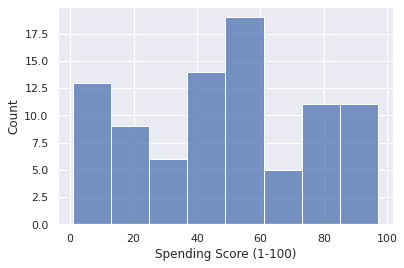

In [ ]:
# make a basic histogram using the histplot() function
ax = sns.histplot(df_male['Spending Score (1-100)'])

This shows the probability of what males will spend based on their spending score.

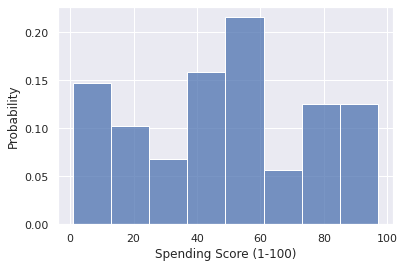

In [ ]:
# histogram showing the percentage of observations in each bin on the y-axis
ax = sns.histplot(df_male['Spending Score (1-100)'], stat='probability')

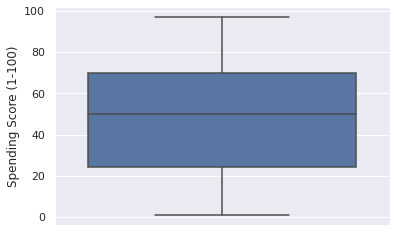

In [ ]:
# Box plots visually illustrate the distribution of values in a category
sns.boxplot(y="Spending Score (1-100)", data=df_male)

To make it easier to use the data, I'm creating a dataframe of just females with their spending score

In [ ]:
# creates a female dataframe for hypothesis testing
df_female = spending_df.loc[spending_df['Genre'] == 'Female']
df_female.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


This will calculate the statistical measures of: # of females in the file, mean, standard deviation, min and max

In [ ]:
# calculates statistical measures
df_female[['Spending Score (1-100)']].describe()

,Spending Score (1-100)
count,112.000000
mean,51.526786
std,24.114950
min,5.000000
25%,35.000000
50%,50.000000
75%,73.000000
max,99.000000


The chart below shows the spending score of females

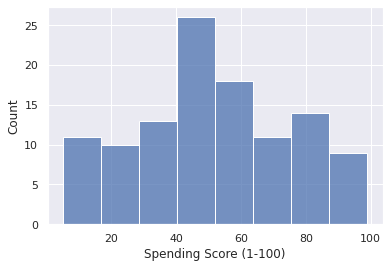

In [ ]:
# make a basic histogram using the histplot() function
ax = sns.histplot(df_female['Spending Score (1-100)'])

This shows the probability of what females will spend based on their spending score.

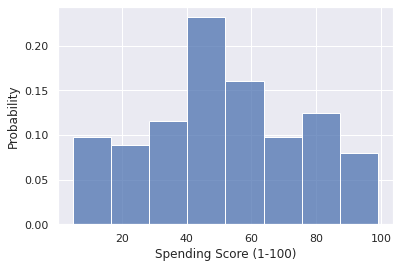

In [ ]:
# histogram showing the percentage of observations in each bin on the y-axis
ax = sns.histplot(df_female['Spending Score (1-100)'], stat='probability')

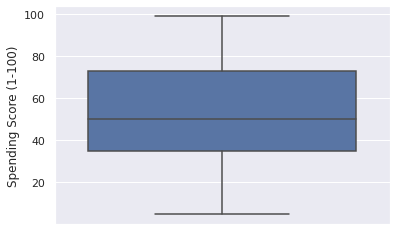

In [ ]:
# Box plots visually illustrate the distribution of values in a category
sns.boxplot(y="Spending Score (1-100)", data=df_female)

In [ ]:
stats.ttest_ind(df_male['Spending Score (1-100)'], df_female['Spending Score (1-100)'])

Ttest_indResult(statistic=-0.8190464150660333, pvalue=0.4137446589852176)

The p value of 0.4137446589852176 is significantly larger than .05 which indicates there is no significant difference in spending between males and females.

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
sample_1_n = df_male.shape[0]
sample_2_n = df_female.shape[0]
sample_1_mean = df_male['Spending Score (1-100)'].mean()
sample_2_mean = df_female['Spending Score (1-100)'].mean()
sample_1_var = df_male['Spending Score (1-100)'].var()
sample_2_var = df_female['Spending Score (1-100)'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df_male['Spending Score (1-100)'],df_female['Spending Score (1-100)'])

'The difference in means at the 95% confidence interval (two-tail) is between -4.327586357982995 and 10.358430513827159.'

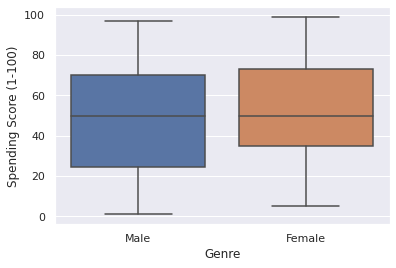

In [ ]:
# This shows how the spending score distributed across genders
sns.boxplot(y="Spending Score (1-100)", x="Genre", data=spending_df)

**Hypothesis Test 1 results:**  The box plot above shows there is no statistical difference between the spending habits of males and females. Plus, the p value of 0.4137 shows isn't a significant difference in the probability (p>a) of females spending more than males. This test will change the minds of everyone who believes females spend more than males. From a business perspective, it shows that the mall will be profitable by targeting both males and females.

# **Hypothesis Test 2**

This hypothesis test will compare spending between ages 31-40 to 41-50 in order to determine if the significance level is Ho: no statistical difference between male and female spending or if the level is Ha: there is statistical difference between male and female spending.

In [ ]:
# creates a 31-40 age group dataframe for hypothesis testing
df_thirties = spending_df.loc[(spending_df.Age >= 31) & (spending_df.Age <= 40)]
df_thirties.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
4,5,Female,31,17,40
6,7,Female,35,18,6
11,12,Female,35,19,99
14,15,Male,37,20,13
16,17,Female,35,21,35


This will calculate the statistical measures of: # of mall customer between the ages of 31 and 40 in the file, mean, standard deviation, min and max

In [ ]:
# calculates statistical measures
df_thirties[['Spending Score (1-100)']].describe()

,Spending Score (1-100)
count,60.000000
mean,57.500000
std,28.875243
min,1.000000
25%,35.000000
50%,61.000000
75%,80.500000
max,99.000000


The chart below shows the spending score of those in their 30s

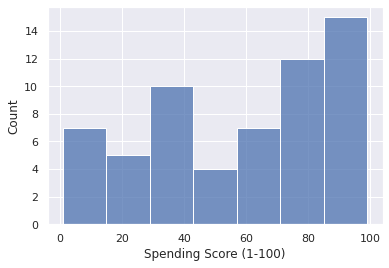

In [ ]:
# make a basic histogram using the histplot() function
ax = sns.histplot(df_thirties['Spending Score (1-100)'])

This shows the probability of what those in their 30s will spend based on their spending score.

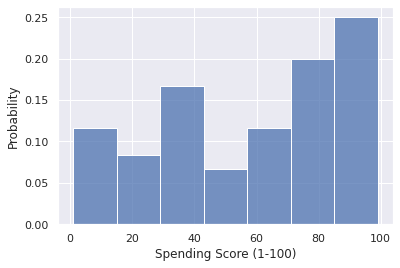

In [ ]:
# histogram showing the percentage of observations in each bin on the y-axis
ax = sns.histplot(df_thirties['Spending Score (1-100)'], stat='probability')

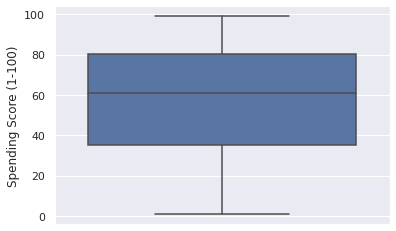

In [ ]:
# Box plots visually illustrate the distribution of values in a category
sns.boxplot(y="Spending Score (1-100)", data=df_thirties)

In [ ]:
# creates a 41-50 age group dataframe for hypothesis testing
df_forties = spending_df.loc[(spending_df.Age >= 41) & (spending_df.Age <= 50)]
df_forties.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
22,23,Female,46,25,5
26,27,Female,45,28,32
34,35,Female,49,33,14
36,37,Female,42,34,17
42,43,Male,48,39,36


This will calculate the statistical measures of: # of mall customers in their 40s, mean, standard deviation, min and max

In [ ]:
# calculates statistical measures
df_forties[['Spending Score (1-100)']].describe()

,Spending Score (1-100)
count,38.000000
mean,34.394737
std,15.931508
min,5.000000
25%,17.750000
50%,37.500000
75%,46.750000
max,59.000000


The chart below shows the spending score of those in their 40s

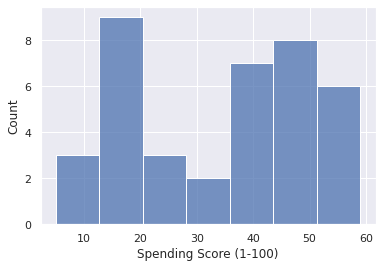

In [ ]:
# make a basic histogram using the histplot() function
ax = sns.histplot(df_forties['Spending Score (1-100)'])

The chart below shows the spending probability of those in their 40s

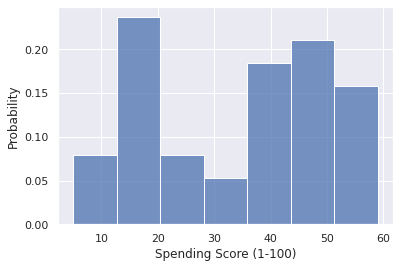

In [ ]:
# histogram showing the percentage of observations in each bin on the y-axis
ax = sns.histplot(df_forties['Spending Score (1-100)'], stat='probability')

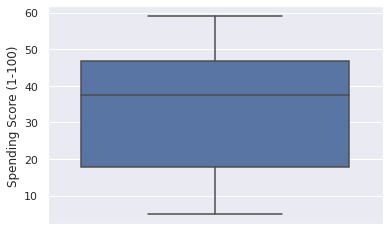

In [ ]:
# Box plots visually illustrate the distribution of values in a category
sns.boxplot(y="Spending Score (1-100)", data=df_forties)

In [ ]:
stats.ttest_ind(df_thirties['Spending Score (1-100)'], df_forties['Spending Score (1-100)'])

Ttest_indResult(statistic=4.511397746490299, pvalue=1.8244075584714096e-05)

The p value of 1.8244075584714096e-05 is significantly smaller than .05 which indicates there is significant difference in spending between the two age groups.

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
sample_1_n = df_thirties.shape[0]
sample_2_n = df_forties.shape[0]
sample_1_mean = df_thirties['Spending Score (1-100)'].mean()
sample_2_mean = df_forties['Spending Score (1-100)'].mean()
sample_1_var = df_thirties['Spending Score (1-100)'].var()
sample_2_var = df_forties['Spending Score (1-100)'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math

def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df_thirties['Spending Score (1-100)'],df_forties['Spending Score (1-100)'])

'The difference in means at the 95% confidence interval (two-tail) is between -31.9958922280505 and -14.214634087738979.'

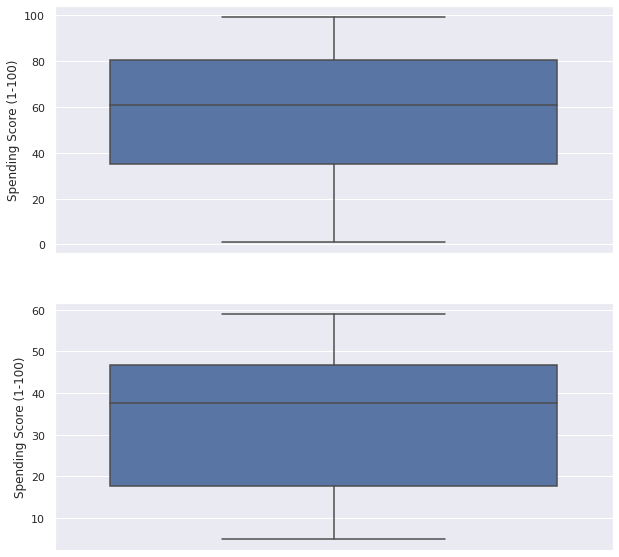

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,10])

plt.subplot(211)
sns.boxplot(y="Spending Score (1-100)", data = df_thirties)

plt.subplot(212)
sns.boxplot(y="Spending Score (1-100)", data = df_forties)

**Hypothesis Test 2 results:** The box plot above shows there is statistical difference between the spending habits of those in their 30s compared to those in their 40s. I can reject the null that there is not difference between the spending score population means of those in their 30s compared to those in their 40s. The difference is significant at the <.05 level with 95% confidence the difference is between -31.996 and -14.215. This test will allow stores to know who to best target when purchasing product and in their advertising. From a business perspective, it shows that the mall will be profitable by bringing in stores with products targeting those in their 30s. 

# **Recommendation**
After analyzing the data on the amount spent between female and male mall customers with memberships, I would recommend targeting promotions to both equally. The data did not show enough difference in the amount spent between females and males to suggest targeting one over the other. Also ensure the stores in the mall provide products and promotions equally to females and males to provide opportunity to achieve the highest sales and revenue. 

Additionally, I analyzed the amount spent between people in their thirties compared to those in their forties. The analysis showed mall customers in their thirties, regardless of whether they are female or male, had a significantly higher difference in the amount spent than those in their forties. I would recommend the mall and stores take into account the age of the customers spending the most to attract them to the mall, which will provide the opportunity for higher sales and revenue.